In [1]:
'''
This script collects all my answers to the questions regarding the second Machine Learning project 
from the Udemy course - 2022 Python for Machine Learning & Data Science Masterclass

The goal is to create a Classification Model that can predict whether or not a person 
has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)

Dataframe used is also present in this directory.

''';

In [2]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Main dataframe
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#Explore if the dataset has any missing data points and create a statistical summary 
#of the numerical features as shown below.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


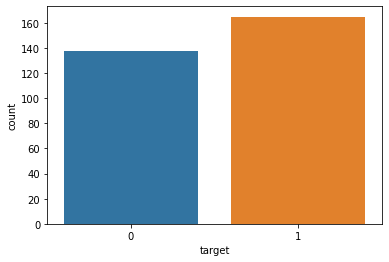

In [7]:
#Create a bar plot that shows the total counts per target value

sns.countplot(data = df, x = 'target');

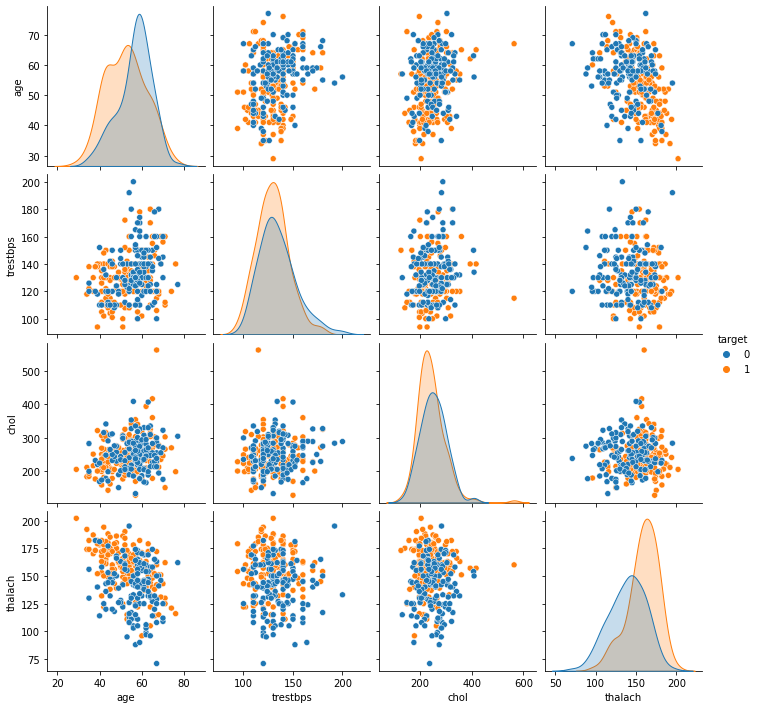

In [8]:
#Create a pairplot that displays the relationships between the following columns: 
#['age','trestbps', 'chol','thalach','target']

sns.pairplot(data = df[['age','trestbps', 'chol','thalach','target']], hue = 'target');

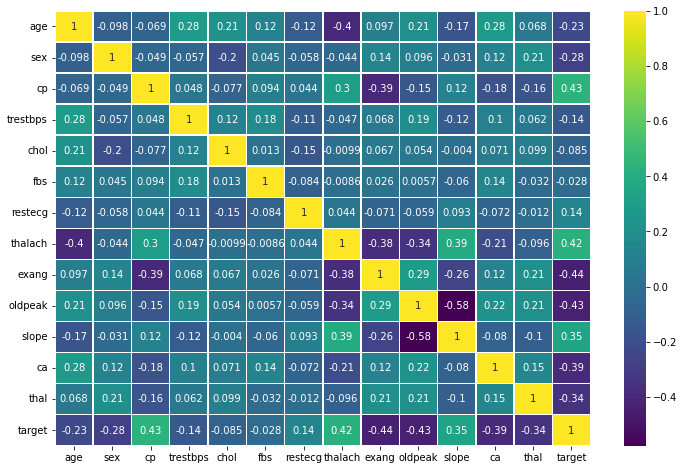

In [9]:
#Create a heatmap that displays the correlation between all the columns

plt.figure(figsize=(12,8))
sns.heatmap(data = df.corr(), linewidths = 0.5, annot = True,
           cmap = 'viridis');

Machine Learning

In [10]:
#Separate the features from the labels into 2 objects, X and y

X = df.drop('target', axis = 1)
y = df['target']

In [11]:
#Perform a train test split on the data, with the test size of 10% and a random_state of 101

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [12]:
#Create a StandardScaler object and normalize the X train and test set feature data. 
#Make sure you only fit to the training data to avoid data leakage

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [13]:
#Create a Logistic Regression model and use Cross-Validation to find a well-performing 
#C value for the hyper-parameter search

from sklearn.linear_model import LogisticRegressionCV

In [14]:
#creating the model itself

log_model = LogisticRegressionCV()

log_model.fit(scaled_X_train, y_train)

LogisticRegressionCV()

In [15]:
# Report back your search's optimal parameters, specifically the C value.

log_model.C_

array([0.04641589])

In [16]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [17]:
#Report back the model's coefficients

log_model.coef_[0]

array([-0.09621199, -0.39460154,  0.53534731, -0.13850191, -0.08830462,
        0.02487341,  0.08083826,  0.29914053, -0.33438151, -0.352386  ,
        0.25101033, -0.49735752, -0.37448551])

In [18]:
# We didn't show this in the lecture notebooks, but you have the skills to do this! 
# Create a visualization of the coefficients by using a barplot of their values. 
# Even more bonus points if you can figure out how to sort the plot!

coefs = pd.Series(index = X.columns, data = log_model.coef_[0])

In [19]:
coefs = coefs.sort_values()

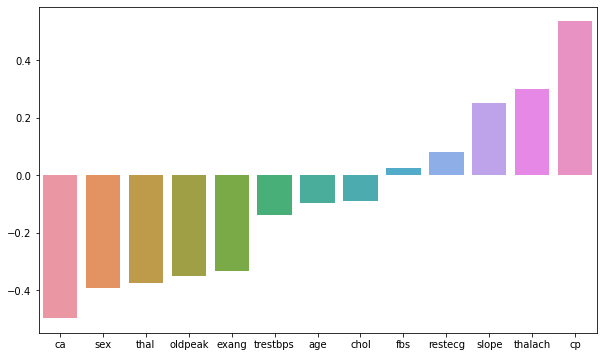

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(x = coefs.index, y = coefs.values);

Model Performance Evaluation

Let's now evaluate the model on the remaining 10% of the data, the test set.

Create the following evaluations:
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [21]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report

In [22]:
#Confusion Matrix array

y_pred = log_model.predict(scaled_X_test)

In [23]:
confusion_matrix(y_test, y_pred)

array([[12,  3],
       [ 2, 14]], dtype=int64)

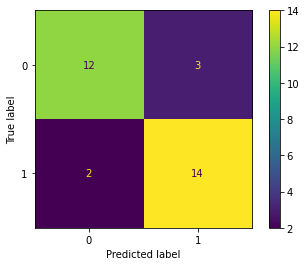

In [25]:
#Confusion Matrix Plot
plot_confusion_matrix(log_model, scaled_X_test, y_test);

In [26]:
#Classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



Performance Curves

In [27]:
#Create both the precision recall curve and the ROC Curve.

from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

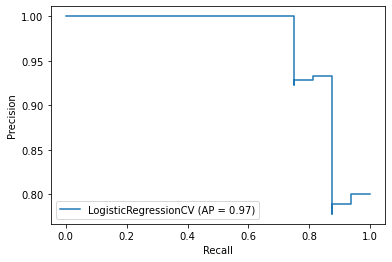

In [29]:
plot_precision_recall_curve(log_model, scaled_X_test, y_test);

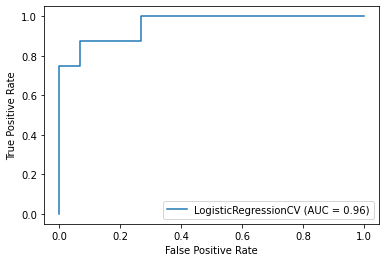

In [30]:
plot_roc_curve(log_model, scaled_X_test, y_test);

**Final Task: A patient with the following features has come into the medical office:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

In [ ]:
#What does your model predict for this patient? 
#Do they have heart disease? How "sure" is your model of this prediction?

In [33]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [34]:
#The answer is 0, the patient likely does not have heart disease

log_model.predict(patient)

array([0], dtype=int64)

In [35]:
#How likely? Around 99,9% sure

log_model.predict_proba(patient)

array([[9.99999862e-01, 1.38455917e-07]])